In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [78]:
url="https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv"
dataset=pd.read_csv(url)

In [79]:
dataset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [80]:
dataset.shape

(973, 15)

In [81]:
dataset.isnull().sum() #any values null

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [82]:
y = dataset['Calories_Burned']
X = dataset.drop(['Calories_Burned', 'Workout_Type', 'Gender'], axis=1)

In [83]:
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,29.2,2.8,3,1,14.39


In [84]:
X.shape

(973, 12)

In [96]:
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [118]:
class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel, self).__init__()
    self.layer1=nn.Linear(12,1)

  def forward(self,x):
    x=self.layer1(x)
    return x

In [119]:
model:RegressionModel=RegressionModel()

In [148]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [149]:
train_loss=[]
test_loss=[]
train_accuracy=[]
train_loss=[]

In [150]:
num_epochs = 5000
train_losses = []  # Initialize the list for storing training losses
test_losses = []  # Initialize the list for storing test losses

for ep in range(num_epochs):
    # Training mode
    model.train()

    # Forward pass
    predicted_y = model(X_train_tensor).squeeze()
    y_train = y_train_tensor.squeeze()
    losses = loss(predicted_y, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    losses.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    # Print training loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Training Loss: {losses.item()}")

    # Append the training loss to the list
    train_losses.append(losses.item())

    # Evaluate on test set
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradients needed for evaluation
        predicted_y_test = model(X_test_tensor).squeeze()
        y_test=y_test_tensor.squeeze()
        test_loss = loss(predicted_y_test, y_test_tensor)

    # Append the test loss to the list
    test_losses.append(test_loss.item())

    # Print test loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Test Loss: {test_loss.item()}")


Epoch [0/5000], Training Loss: 2106.772216796875
Epoch [0/5000], Test Loss: 2093.12646484375
Epoch [100/5000], Training Loss: 2106.580322265625
Epoch [100/5000], Test Loss: 2092.838134765625
Epoch [200/5000], Training Loss: 2106.38916015625
Epoch [200/5000], Test Loss: 2092.552734375
Epoch [300/5000], Training Loss: 2106.198486328125
Epoch [300/5000], Test Loss: 2092.272216796875
Epoch [400/5000], Training Loss: 2106.01220703125
Epoch [400/5000], Test Loss: 2091.99658203125
Epoch [500/5000], Training Loss: 2105.82373046875
Epoch [500/5000], Test Loss: 2091.7138671875
Epoch [600/5000], Training Loss: 2105.640380859375
Epoch [600/5000], Test Loss: 2091.43505859375
Epoch [700/5000], Training Loss: 2105.45654296875
Epoch [700/5000], Test Loss: 2091.157958984375
Epoch [800/5000], Training Loss: 2105.27392578125
Epoch [800/5000], Test Loss: 2090.884765625
Epoch [900/5000], Training Loss: 2105.093017578125
Epoch [900/5000], Test Loss: 2090.613525390625
Epoch [1000/5000], Training Loss: 2104.9

In [151]:
predicted_y_test = predicted_y_test.numpy()  # Convert PyTorch tensor to numpy
y_test = y_test_tensor.numpy()  # Convert PyTorch tensor to numpy

# Create a dictionary with the two arrays
d = {'y_pred': predicted_y_test.flatten(), 'y_test': y_test.flatten()}

# Create a DataFrame
df = pd.DataFrame(d)

# Print the DataFrame
print(df)

          y_pred  y_test
0     738.436157   796.0
1     603.347900   643.0
2     816.447937   740.0
3     255.441422   331.0
4    1070.458008  1151.0
..           ...     ...
239   259.466980   330.0
240   989.329956   977.0
241  1382.326660  1345.0
242  1009.206665  1017.0
243   673.776672   707.0

[244 rows x 2 columns]


In [152]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predicted_y_test)
mae = mean_absolute_error(y_test, predicted_y_test)
r2 = r2_score(y_test, predicted_y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2081.016357421875
Mean Absolute Error (MAE): 35.77678298950195
R-squared (R²): 0.9724113941192627


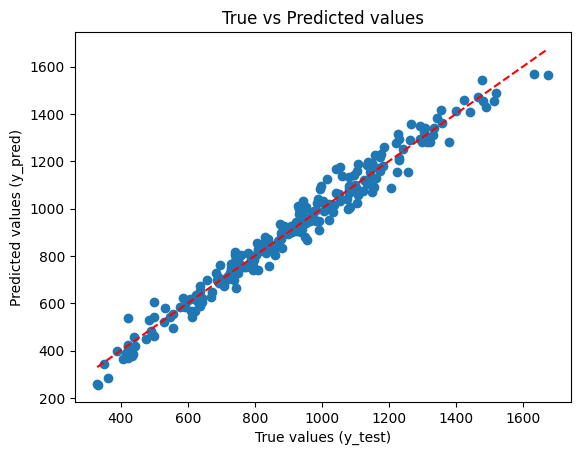

In [153]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_y_test)
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("True vs Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()
